In [208]:
import pandas as pd
# Load the CSV file
visa_df = pd.read_csv("visadata.csv")
tourism_df = pd.read_csv("destinations.csv", encoding="ISO-8859-1")

# Check it loaded properly
print("Visa Data:")
display(visa_df.head())
print("Destination data:")
tourism_df.head()




Visa Data:


,reporting_year,reporting_state,consulate_country,consulate_country_code,consulate_country_region,consulate_country_income_group,consulate_city,visitor_visa_applications,visitor_visa_issued,visitor_visa_not_issued,visitor_visa_refusal_rate
0,2023,Austria,Albania,ALB,Europe & Central Asia,Upper middle income,TIRANA,73,64,7,0.098592
1,2023,Austria,Algeria,DZA,Middle East & North Africa,Lower middle income,ALGIERS,1953,1009,937,0.481501
2,2023,Austria,Argentina,ARG,Latin America & Caribbean,Upper middle income,BUENOS AIRES,13,13,0,0.000000
3,2023,Austria,Australia,AUS,East Asia & Pacific,High income,CANBERRA,3638,3583,55,0.015118
4,2023,Austria,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,BAKU,2676,2610,62,0.023204


Destination data:


,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


In [210]:
#Clean column names and remove unnecessary rows (if any):
visa_df.columns = visa_df.columns.str.strip()
tourism_df.columns = tourism_df.columns.str.strip()


In [212]:
#check for missing values 
visa_df.isnull().sum()
tourism_df.isnull().sum()


Destination                     0
Region                          0
Country                         0
Category                        0
Latitude                        0
Longitude                       0
Approximate Annual Tourists     0
Currency                        0
Majority Religion               0
Famous Foods                    0
Language                        0
Best Time to Visit              0
Cost of Living                  0
Safety                          0
Cultural Significance           0
Description                    50
dtype: int64

In [214]:
#Standardize country names to help with merging
visa_df['consulate_country'] = visa_df['consulate_country'].str.strip().str.lower()
tourism_df['Country'] = tourism_df['Country'].str.strip().str.lower()


In [216]:
#merge the data
merged_df = pd.merge(
    visa_df, tourism_df,
    how="inner",
    left_on="consulate_country",
    right_on="Country"
)
merged_df.head()


,reporting_year,reporting_state,consulate_country,consulate_country_code,consulate_country_region,consulate_country_income_group,consulate_city,visitor_visa_applications,visitor_visa_issued,visitor_visa_not_issued,...,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,13.5 million,Euro,Protestant,"Currywurst, Bratwurst, Sauerkraut",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch for pickpockets",The capital city known for its historical land...,"Famous for the Brandenburg Gate, Berlin Wall, ..."
1,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,10 million,Euro,Protestant,"Weiáwurst, Brezn, Leberkse",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,Generally safe,"A Bavarian city famous for its Oktoberfest, be...","Known for its beer culture, historic Marienpla..."
2,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,7 million,Euro,Protestant,"Frankfurter Kranz, Apfelwein, Grne Soáe",German,Spring (April-May) or Fall (Sept-Oct),High,Generally safe,"A financial center known for its skyscrapers, ...","Home to the European Central Bank, Goethe Hous..."
3,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,5 million,Euro,Protestant,"Klsch, Himmel un d, Sauerbraten",German,Spring (April-May) or Fall (Sept-Oct),Medium,Generally safe,"A historic city on the Rhine, known for its Go...",The Cologne Cathedral is a UNESCO World Herita...
4,2023,Austria,germany,DEU,Europe & Central Asia,High income,MUNICH,128,122,3,...,5 million,Euro,Protestant,"Fischbrtchen, Labskaus, Rote Grtze",German,Spring (April-May) or Fall (Sept-Oct),Medium-high,Generally safe,"A port city known for its harbor, Reeperbahn d...","Hamburg boasts a lively arts scene, modern arc..."


In [218]:
# Clean and map "Safety"
model_df["Safety"] = model_df["Safety"].astype(str).str.strip().str.lower().map({
    "low": 1,
    "medium": 2,
    "medium-high": 3,
    "high": 4
})

# Clean and map "Cost of Living"
model_df["Cost of Living"] = model_df["Cost of Living"].astype(str).str.strip().str.lower().map({
    "low": 1,
    "medium": 2,
    "medium-high": 3,
    "high": 4
})

# Drop rows with missing values in critical columns
model_df = model_df.dropna(subset=[
    "visitor_visa_refusal_rate",
    "Safety",
    "Cost of Living",
    "Approximate Annual Tourists"
])

# Convert all modeling columns to numeric
model_df["Approximate Annual Tourists"] = pd.to_numeric(model_df["Approximate Annual Tourists"], errors="coerce")
model_df["visitor_visa_refusal_rate"] = pd.to_numeric(model_df["visitor_visa_refusal_rate"], errors="coerce")
model_df["Safety"] = pd.to_numeric(model_df["Safety"], errors="coerce")
model_df["Cost of Living"] = pd.to_numeric(model_df["Cost of Living"], errors="coerce")

# Final drop for NaNs after conversion
model_df = model_df.dropna(subset=[
    "visitor_visa_refusal_rate",
    "Safety",
    "Cost of Living",
    "Approximate Annual Tourists"
])


In [220]:
def convert_tourist_count(x):
    if isinstance(x, str):
        x = x.lower().replace(",", "").strip()
        match = re.search(r"(\d+(\.\d+)?)", x)
        if match:
            number = float(match.group(1))
            # If 'million' is in the string, multiply
            if "million" in x:
                return number * 1_000_000
            else:
                return number  # already numeric
        return None
    return x


In [222]:
merged_df["Approximate Annual Tourists"] = merged_df["Approximate Annual Tourists"].apply(convert_tourist_count)


In [224]:
print(merged_df["Approximate Annual Tourists"].describe())


count    6.835900e+04
mean     3.031470e+06
std      4.794942e+06
min      1.000000e+04
25%      5.000000e+05
50%      1.500000e+06
75%      3.000000e+06
max      3.500000e+07
Name: Approximate Annual Tourists, dtype: float64


In [226]:

merged_df["Approximate Annual Tourists"] = merged_df["Approximate Annual Tourists"].apply(convert_tourist_count)


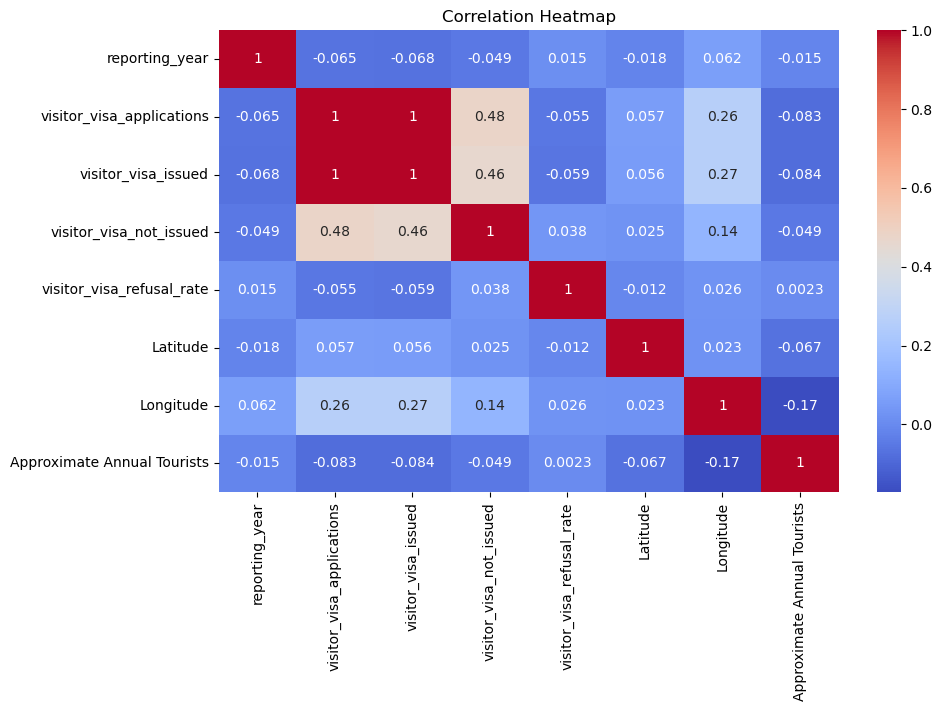

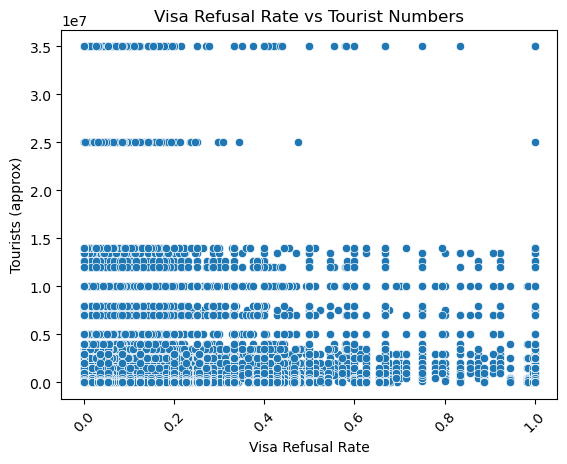

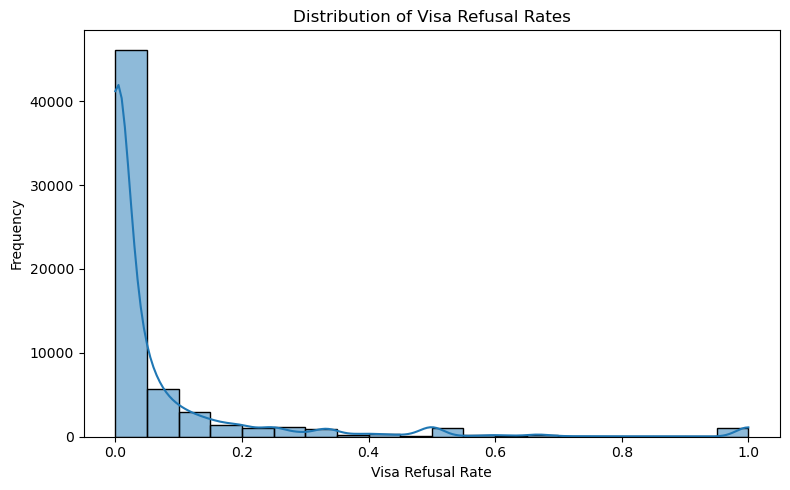

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot: Visa Rejection Rate vs Tourist Numbers
sns.scatterplot(
    x="visitor_visa_refusal_rate",
    y="Approximate Annual Tourists",
    data=merged_df
)
plt.title("Visa Refusal Rate vs Tourist Numbers")
plt.xlabel("Visa Refusal Rate")
plt.ylabel("Tourists (approx)")
plt.xticks(rotation=45)
plt.show()

# Histogram of Visa Refusal Rate
plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x="visitor_visa_refusal_rate", kde=True, bins=20)
plt.title("Distribution of Visa Refusal Rates")
plt.xlabel("Visa Refusal Rate")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




In [234]:
import scipy.stats as stats

# Drop rows where either variable is still missing (if any)
cleaned_df = merged_df.dropna(subset=["visitor_visa_refusal_rate", "Approximate Annual Tourists"])

# Redefine groups using cleaned data
threshold = cleaned_df["visitor_visa_refusal_rate"].median()
group_high = cleaned_df[cleaned_df["visitor_visa_refusal_rate"] > threshold]
group_low = cleaned_df[cleaned_df["visitor_visa_refusal_rate"] <= threshold]

# Run t-test
t_stat, p_value = stats.ttest_ind(
    group_high["Approximate Annual Tourists"],
    group_low["Approximate Annual Tourists"],
    nan_policy='omit'
)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -17.141222198042385, P-value: 1.03243701295716e-65
